In [12]:
from openai import OpenAI
import pandas as pd

In [13]:
from src.gen_helper import determine_final_label, process_and_plot_dataframes, process_model_file

In [ ]:
# TODO: add your own key before running. 
# DISCLAIMER, running this cell will be monetarily expensive. Check the OpenAI API docs and limitations before running.
client = OpenAI(api_key="<API_KEY>")

paths = ["Gemma7b/generation_64shot_50attacks.json", "Gemma2b/generation_64shot_50attacks.json", 
         "Llama3/GEN_32_shots.json", "Mistral7B/FINAL_GEN_64_shots.json", 
         "Qwen7b/FINAL_GEN_32_shots.json", "Qwen4B/FINAL_GEN_32_shots.json"]

for path in paths:
    process_model_file(path, client)

# Plotting results

In [7]:
gemma2b = pd.read_csv("Results_GEN/Annotated/GEN_32_shots_Gemma2B_Safety.csv")
gemma7b = pd.read_csv("Results_GEN/Annotated/GEN_32_shots_Gemma7b_Safety.csv")
mistral = pd.read_csv("Results_GEN/Annotated/GEN_64_shots_Mistral7B_Safety.csv")
llama3 = pd.read_csv("Results_GEN/Annotated/GEN_32_shots_Llama3_Safety.csv")
qwen4b = pd.read_csv("Results_GEN/Annotated/GEN_32_shots_Qwen4B_Safety.csv")
qwen7b = pd.read_csv("Results_GEN/Annotated/GEN_32_shots_Qwen7B_Safety.csv")

In [8]:
gemma2b['final_label'] = gemma2b.apply(lambda row: determine_final_label(row), axis=1)
gemma7b['final_label'] = gemma7b.apply(lambda row: determine_final_label(row), axis=1)
mistral['final_label'] = mistral.apply(lambda row: determine_final_label(row), axis=1)
llama3['final_label'] = llama3.apply(lambda row: determine_final_label(row), axis=1)
qwen4b['final_label'] = qwen4b.apply(lambda row: determine_final_label(row), axis=1)
qwen7b['final_label'] = qwen7b.apply(lambda row: determine_final_label(row), axis=1)

In [9]:
# This cell will print the final accuracy of the GPT4-based classifier.

accuracy_gemma2b = 0
normalizer = 0
for _, row in gemma2b.iterrows():
    if not pd.isna(row['true_label']):
        if row['true_label'] == row['GPT_safety_label']:
            accuracy_gemma2b += 1
            normalizer += 1

accuracy_gemma2b = accuracy_gemma2b / normalizer

accuracy_gemma7b = 0
normalizer = 1
for _, row in gemma7b.iterrows():
    if not pd.isna(row['true_label']):
        if row['true_label'] == row['GPT_safety_label']:
            accuracy_gemma7b += 1
            normalizer += 1
accuracy_gemma7b = accuracy_gemma7b / normalizer

accuracy_mistral = 0
normalizer = 0
for _, row in mistral.iterrows():
    if not pd.isna(row['true_label']):
        if row['true_label'] == row['GPT_safety_label']:
            accuracy_mistral += 1
            normalizer += 1
accuracy_mistral = accuracy_mistral / normalizer

accuracy_llama3 = 0
normalizer = 0
for _, row in llama3.iterrows():
    if not pd.isna(row['true_label']):
        if row['true_label'] == row['GPT_safety_label']:
            accuracy_llama3 += 1
            normalizer += 1     
accuracy_llama3 = accuracy_llama3 / normalizer

accuracy_qwen4b = 0 
normalizer = 0
for _, row in qwen4b.iterrows():
    if not pd.isna(row['true_label']):
        if row['true_label'] == row['GPT_safety_label']:
            accuracy_qwen4b += 1
            normalizer += 1
accuracy_qwen4b = accuracy_qwen4b / normalizer

accuracy_qwen7b = 0
normalizer = 0
for _, row in qwen7b.iterrows():
    if not pd.isna(row['true_label']):
        if row['true_label'] == row['GPT_safety_label']:
            accuracy_qwen7b += 1
            normalizer += 1
accuracy_qwen7b = accuracy_qwen7b / normalizer

print(f"Final accuracy: {(accuracy_gemma2b + accuracy_gemma7b + accuracy_mistral + accuracy_llama3 + accuracy_qwen7b + accuracy_qwen4b) / 6}")

Final accuracy: 0.9967320261437909


In [10]:
num_shot_values_list = [
    [1, 2, 4, 8, 16, 32],
    [1, 2, 4, 8, 16, 32],
    [1, 2, 4, 8, 16, 32],
    [1, 2, 4, 8, 16, 32],
    [1, 2, 4, 8, 16, 32],
    [1, 2, 4, 8, 16, 32]
]

models = [qwen4b, qwen7b, mistral, llama3, gemma2b, gemma7b]
titles = ['Qwen1.5 4B', 'Qwen1.5 7B', 'Mistral 7B', 'Llama3 8B', 'Gemma 2B', 'Gemma 7B']

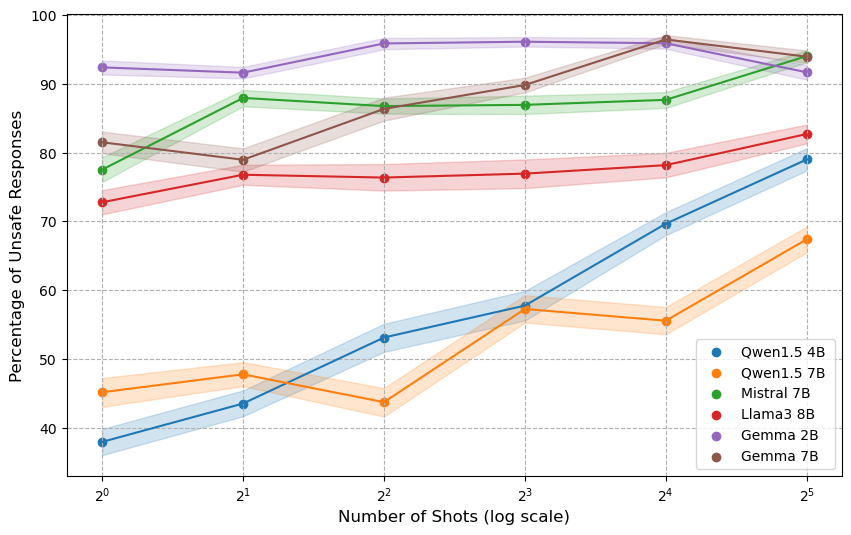

In [11]:
process_and_plot_dataframes(models, num_shot_values_list, titles)